# Evaluate likelihood ratio

In [4]:
import sys, os
import logging
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

sys.path.append("../")
from inference.utils import s_from_r

## Data

In [25]:
filenames = [
    #"carl_fix",
    #"alice_fix",
    "alices_fix",
    #"carl_mass",
    #"alice_mass",
    "alices_mass",
    #"carl_align",
    #"alice_align",
    #"alices_align",
    #"carl_full",
    #"alice_full",
    "alices_full",
    #"carl_full_aux",
    #"alice_full_aux",
    #"alices_full_aux",
]
labels = [
    #"CARL (fix)",
    #"ALICE (fix)",
    "ALICES (fix)",
    #"CARL (mass)",
    #"ALICE (mass)",
    "ALICES (mass)",
    #"CARL (align)",
    #"ALICE (align)",
    #"ALICES (align)",
    #"CARL (full)",
    #"ALICE (full)",
    "ALICES (full)",
    #"CARL (full-aux)",
    #"ALICE (full-aux)",
    #"ALICES (full-aux)",
]

nmethods = len(filenames)
ncols = 2
nrows = nmethods // ncols

In [26]:
llrs = np.asarray([np.load("../data/results/llr_{}_grid.npy".format(filename)) for filename in filenames])

In [28]:
llrs.shape

(3, 625, 100000)

In [29]:
idx = 356
log_r = llrs[:, idx, :]
s = s_from_r(np.exp(log_r))

## Histograms

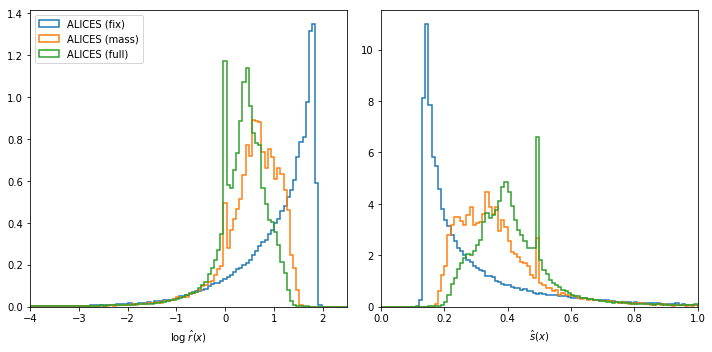

In [33]:
fig = plt.figure(figsize=(10., 5.))

ax = plt.subplot(1,2,1)
for i, x in enumerate(log_r):
    plt.hist(x, range=(-4., 2.5), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True, label=labels[i])
plt.legend(loc="upper left")
plt.xlim(-4.,2.5)
plt.xlabel(r"$\log \; \hat{r}(x)$")

ax = plt.subplot(1,2,2)
for i, x in enumerate(s):
    plt.hist(x, range=(0., 1.), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True)
plt.xlim(0.,1.)
plt.xlabel(r"$\hat{s}(x)$")

plt.tight_layout()
plt.savefig("../figures/output_histo.pdf")
